## Self Balancing Robot in PyBullet
**Balance and control of a 2-wheeled robot simulated with PyBullet Physics library**
<br>V1: Step by Step Loading and Simulation

Importing Required Libraries

In [1]:
import pybullet
import time
import pybullet_data
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces

Loading Physics Environment

In [2]:
phisycsClient = pybullet.connect(pybullet.GUI)
pybullet.setAdditionalSearchPath(pybullet_data.getDataPath())

Resetting Environment

In [19]:
pybullet.resetSimulation()
planeID = pybullet.loadURDF("plane.urdf")
pybullet.setGravity(0,0,-9.81)
robotID = pybullet.loadURDF("robot.urdf",
                         [0.6,0.3,0.0],pybullet.getQuaternionFromEuler([0.0,0.0,0.0]),useFixedBase = 0)
pybullet.setRealTimeSimulation(0)

 Discrete Time Simulation

In [18]:
for i in range(1000):
    pybullet.setJointMotorControl2(bodyUniqueId=robotID, 
                            jointIndex=0, 
                            controlMode=pybullet.VELOCITY_CONTROL, 
                            targetVelocity=+10)
    pybullet.setJointMotorControl2(bodyUniqueId=robotID, 
                            jointIndex=1, 
                            controlMode=pybullet.VELOCITY_CONTROL, 
                            targetVelocity=-10)
    pybullet.stepSimulation()
    time.sleep(1.0/240.0)

Real Time Simulation

In [17]:
pybullet.setRealTimeSimulation(1)
pybullet.setJointMotorControl2(bodyUniqueId=robotID, 
                        jointIndex=0, 
                        controlMode=pybullet.VELOCITY_CONTROL, 
                        targetVelocity=100)
pybullet.setJointMotorControl2(bodyUniqueId=robotID, 
                        jointIndex=1, 
                        controlMode=pybullet.VELOCITY_CONTROL, 
                        targetVelocity=100)

In [ ]:
position, orientation = pybullet.getBasePositionAndOrientation(robotID)
print('Positions:\n',position)
print('Orientation:\n',pybullet.getEulerFromQuaternion(orientation))

PID Controller

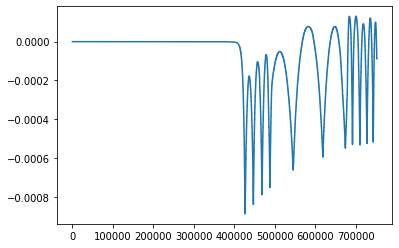

In [32]:
P, I, D = 650.0, 0.005, 10.0 #Setting Kp, Ki, Kd

sim_duration = 0.2 #Simulation Time in Minutes

#Initializing PID Variables
integral = 0
derivative = 0
prev_error = 0

desired_state = 0.0
start_time = time.time()

pybullet.setRealTimeSimulation(1)

error_history = list('')

while(((time.time() - start_time)/60) < sim_duration):
    position, orientation = pybullet.getBasePositionAndOrientation(robotID)
    state = pybullet.getEulerFromQuaternion(orientation)[0]
    error = state - desired_state

    integral += error
    derivative = error - prev_error
    prev_error = error

    motion = (P * error + I * integral + D * derivative)
    
    
    error_history.append(error)
    pybullet.setJointMotorControl2(bodyUniqueId=robotID, 
                        jointIndex=0, 
                        controlMode=pybullet.VELOCITY_CONTROL, 
                        targetVelocity = motion)
    pybullet.setJointMotorControl2(bodyUniqueId=robotID, 
                        jointIndex=1, 
                        controlMode=pybullet.VELOCITY_CONTROL, 
                        targetVelocity = motion)

################################## Ploting Error################################
pybullet.resetSimulation()
plt.plot(error_history)
plt.show()
###################### Reseting Environment after simulation#####################
pybullet.resetSimulation()
planeID = pybullet.loadURDF("plane.urdf")
pybullet.setGravity(0,0,-9.81)
robotID = pybullet.loadURDF("robot.urdf",
                         [0.0,0.0,0.0],pybullet.getQuaternionFromEuler([0.0,0.0,0.0]),useFixedBase = 0)
pybullet.setRealTimeSimulation(0)

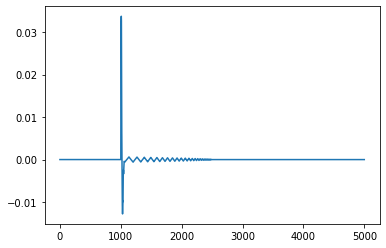

In [36]:
P, I, D = 650.0, 0.005, 10.0 #Setting Kp, Ki, Kd\n",

#Initializing PID Variables
integral = 0
derivative = 0
prev_error = 0
   
desired_state = 0.0 # Holding robot in vertical state
pybullet.setRealTimeSimulation(0)

error_history = list('')

for _ in range(5000):
    pybullet.stepSimulation()
    time.sleep(1.0/240.0)
    position, orientation = pybullet.getBasePositionAndOrientation(robotID)
    state = pybullet.getEulerFromQuaternion(orientation)[0]
    error = state - desired_state

    integral += error
    derivative = error - prev_error
    prev_error = error

    motion = (P * error + I * integral + D * derivative)

    pybullet.setJointMotorControl2(bodyUniqueId=robotID, 
                        jointIndex=0, 
                        controlMode=pybullet.VELOCITY_CONTROL,
                        targetVelocity = motion)
    pybullet.setJointMotorControl2(bodyUniqueId=robotID, 
                        jointIndex=1, 
                        controlMode=pybullet.VELOCITY_CONTROL,
                        targetVelocity = motion)
    # Applying External Force\n",
    if _ == 1000:
        pybullet.applyExternalForce(robotID, 0, forceObj = (0,100,0),
                                    posObj = (0.0, 0.0, 0.0), 
                                    flags = pybullet.LINK_FRAME)
    error_history.append(error)

################################## Ploting Error################################
pybullet.resetSimulation()
plt.plot(error_history)
plt.show()
###################### Reseting Environment after simulation#####################
pybullet.resetSimulation()
planeID = pybullet.loadURDF("plane.urdf")
pybullet.setGravity(0,0,-9.81)
robotID = pybullet.loadURDF("robot.urdf",
                         [0.0,0.0,0.0],pybullet.getQuaternionFromEuler([0.0,0.0,0.0]),useFixedBase = 0)